1. Load the Data

In [113]:
# Load the data
df = pd.read_csv('badmintondata.csv')
print("\nOriginal Data:")
print(f"Initial shape: {df.shape}")
df


Original Data:
Initial shape: (72800, 8)


,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
0,4,1,10,40,0,4.075543,1.0,1.662912
1,4,1,10,40,0,4.152007,1.0,1.724866
2,4,1,10,40,0,4.228906,1.0,1.788139
3,4,1,10,40,0,4.302100,1.0,1.845245
4,4,1,10,40,0,4.376877,1.0,1.904128
...,...,...,...,...,...,...,...,...
72795,0,0,0,0,0,0.000000,0.0,0.000000
72796,0,0,0,0,0,0.000000,0.0,0.000000
72797,0,0,0,0,0,0.000000,0.0,0.000000
72798,0,0,0,0,0,0.000000,0.0,0.000000


2. Data Cleaning

2a. Remove all zeros and below zero

In [114]:
# Remove all the zeros and below zero
df_pos = df[df > 0]
removed_rows_zeros = df.shape[0] - df_pos.dropna().shape[0]
df = df_pos.dropna()
print(f"\nData after removing rows with zero and below values: (removed {removed_rows_zeros} rows)")
print(f"Current shape: {df.shape}")
df


Data after removing rows with zero and below values: (removed 35180 rows)
Current shape: (37620, 8)


,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
200,4.0,1.0,10.0,40.0,1.0,4.075872,1.001324,1.663557
201,4.0,1.0,10.0,40.0,1.0,4.153455,1.002679,1.725432
202,4.0,1.0,10.0,40.0,1.0,4.227359,1.003969,1.786651
203,4.0,1.0,10.0,40.0,1.0,4.302990,1.005289,1.846782
204,4.0,1.0,10.0,40.0,1.0,4.377687,1.006593,1.904467
...,...,...,...,...,...,...,...,...
72634,4.0,4.0,70.0,70.0,15.0,9.217823,5.398111,2.591053
72635,4.0,4.0,70.0,70.0,15.0,9.275177,5.413480,2.041410
72636,4.0,4.0,70.0,70.0,15.0,9.326363,5.427195,1.463594
72637,4.0,4.0,70.0,70.0,15.0,9.370879,5.439123,0.862842


2b. Handle land outside of court -> make some data set outside to be remove

In [115]:
# Handle out-of-court shots:'SHUTTLECOCK POSITIION IN AIR(X ) metres' and 'SHUTTLECOCK POSITIION IN AIR(Y) metres' are the X and Y positions of the shuttlecock
court_length = 13.4  # in metres
court_width = 5.18  # in metres

df_in_court = df.loc[(df['SHUTTLECOCK POSITIION IN AIR(X ) metres'] <= court_length) &
                (df['SHUTTLECOCK POSITIION IN AIR(Y) metres'] <= court_width)]

removed_rows_out_of_court = df.shape[0] - df_in_court.shape[0]
df = df_in_court
print(f"\nData after removing out-of-court shots: (removed {removed_rows_out_of_court} rows)")
print(f"Current shape: {df.shape}")
df


Data after removing out-of-court shots: (removed 620 rows)
Current shape: (37000, 8)


,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
200,4.0,1.0,10.0,40.0,1.0,4.075872,1.001324,1.663557
201,4.0,1.0,10.0,40.0,1.0,4.153455,1.002679,1.725432
202,4.0,1.0,10.0,40.0,1.0,4.227359,1.003969,1.786651
203,4.0,1.0,10.0,40.0,1.0,4.302990,1.005289,1.846782
204,4.0,1.0,10.0,40.0,1.0,4.377687,1.006593,1.904467
...,...,...,...,...,...,...,...,...
72620,4.0,4.0,70.0,70.0,15.0,7.889368,5.042153,7.139764
72621,4.0,4.0,70.0,70.0,15.0,8.018889,5.076858,7.016490
72622,4.0,4.0,70.0,70.0,15.0,8.142079,5.109867,6.862796
72623,4.0,4.0,70.0,70.0,15.0,8.259787,5.141406,6.675603


2c. Remove duplicates(if any): 

In [116]:
# Remove duplicates(if any): 
df_no_duplicates = df.drop_duplicates()
removed_rows_duplicates = df.shape[0] - df_no_duplicates.shape[0]
df = df_no_duplicates
print(f"\nData after removing duplicates: (removed {removed_rows_duplicates} rows)")
print(f"Current shape: {df.shape}")
df


Data after removing duplicates: (removed 0 rows)
Current shape: (37000, 8)


,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
200,4.0,1.0,10.0,40.0,1.0,4.075872,1.001324,1.663557
201,4.0,1.0,10.0,40.0,1.0,4.153455,1.002679,1.725432
202,4.0,1.0,10.0,40.0,1.0,4.227359,1.003969,1.786651
203,4.0,1.0,10.0,40.0,1.0,4.302990,1.005289,1.846782
204,4.0,1.0,10.0,40.0,1.0,4.377687,1.006593,1.904467
...,...,...,...,...,...,...,...,...
72620,4.0,4.0,70.0,70.0,15.0,7.889368,5.042153,7.139764
72621,4.0,4.0,70.0,70.0,15.0,8.018889,5.076858,7.016490
72622,4.0,4.0,70.0,70.0,15.0,8.142079,5.109867,6.862796
72623,4.0,4.0,70.0,70.0,15.0,8.259787,5.141406,6.675603


2d. Handling missing values:

In [117]:
# Checking for missing values
missing_values = df.isna().sum()
print(f"\nMissing values in the data: \n{missing_values}")


Missing values in the data: 
HUMAN PLAYER POSITION (X) metres               0
HUMAN PLAYER POSITION (Y) metres               0
INITITAL VELOCITY OF SHUTTELCOCK(m/s)          0
INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)      0
SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)    0
SHUTTLECOCK POSITIION IN AIR(X ) metres        0
SHUTTLECOCK POSITIION IN AIR(Y) metres         0
SHUTTLECOCK POSITIION IN AIR(Z) metres         0
dtype: int64


Results above shown no missing values in the dataset provided.

2e. Outliers detection and handling using Inter-Quartile Range (IQR):


Initial shape: (37000, 8)


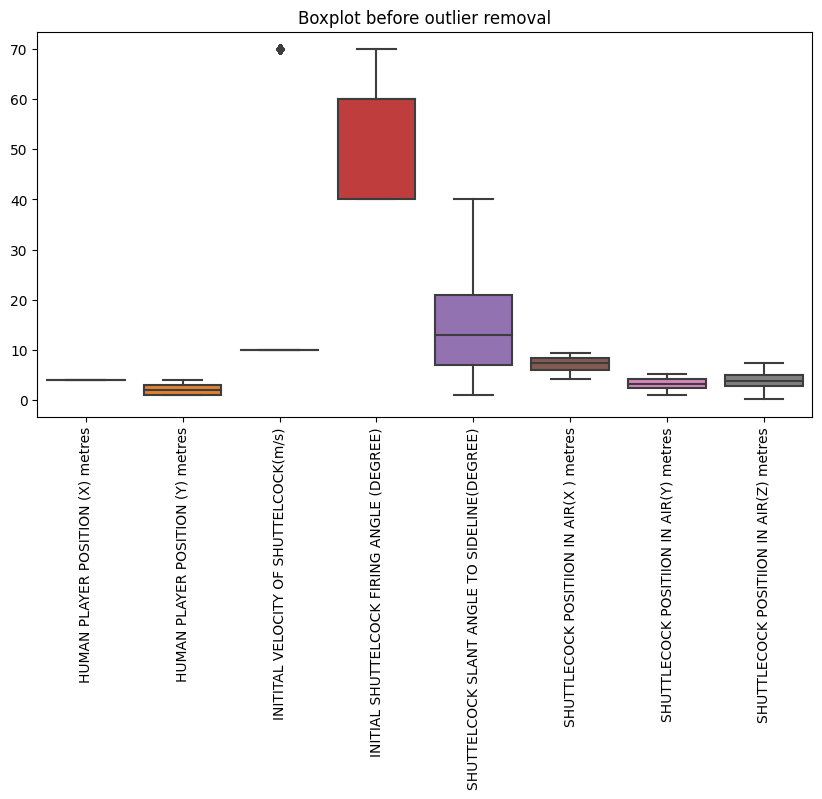


Data after removing outliers: (removed 4216 rows)
Current shape: (32784, 8)


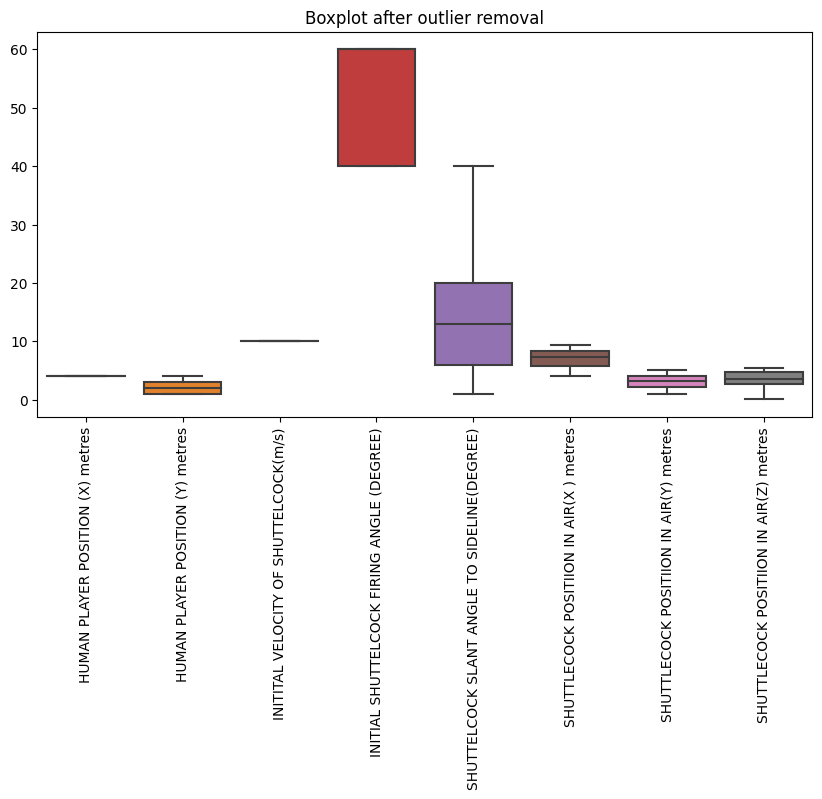

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
200,4.0,1.0,10.0,40.0,1.0,4.075872,1.001324,1.663557
201,4.0,1.0,10.0,40.0,1.0,4.153455,1.002679,1.725432
202,4.0,1.0,10.0,40.0,1.0,4.227359,1.003969,1.786651
203,4.0,1.0,10.0,40.0,1.0,4.302990,1.005289,1.846782
204,4.0,1.0,10.0,40.0,1.0,4.377687,1.006593,1.904467
...,...,...,...,...,...,...,...,...
49944,4.0,4.0,10.0,60.0,10.0,8.885213,4.861395,0.941893
49945,4.0,4.0,10.0,60.0,10.0,8.898323,4.863706,0.739085
49946,4.0,4.0,10.0,60.0,10.0,8.919513,4.867443,0.529859
49947,4.0,4.0,10.0,60.0,10.0,8.935025,4.870178,0.316693


In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print initial data shape
print(f"\nInitial shape: {df.shape}")

# Plotting before outlier removal
plt.figure(figsize=(10,5))
plt.title('Boxplot before outlier removal')
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Calculate Q1, Q3, and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Calculate and print number of rows removed
removed_rows_outliers = df.shape[0] - df_no_outliers.shape[0]
print(f"\nData after removing outliers: (removed {removed_rows_outliers} rows)")

# Print updated data shape
print(f"Current shape: {df_no_outliers.shape}")

# Plotting after outlier removal
plt.figure(figsize=(10,5))
plt.title('Boxplot after outlier removal')
sns.boxplot(data=df_no_outliers)
plt.xticks(rotation=90)
plt.show()

# Update df to df_no_outliers
df = df_no_outliers
df

3. Saving the Cleaned Data into a new CSV file:

In [119]:
# Saving the cleaned data to a new csv file
df.to_csv("cleaned_badmintondata.csv", index=False)
print("Cleaned data saved to 'cleaned-badmintondata.csv'")

Cleaned data saved to 'cleaned_badmintondata.csv'


4. Dimension reduction using Principle Component Analysis(PCA):

To be continue...